In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_sales_data.csv to sample_sales_data.csv


In [ ]:
path = "sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


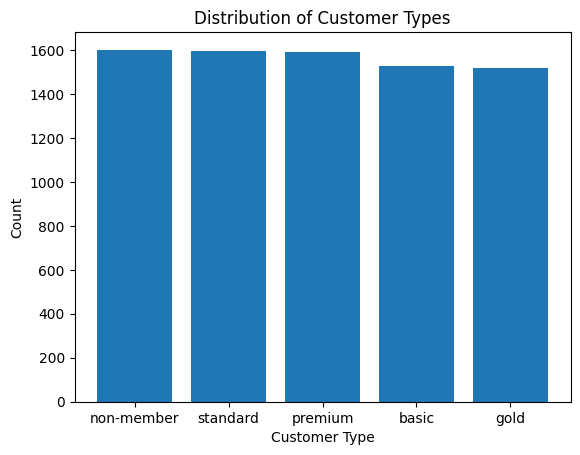

In [ ]:
#Customer types
print(df['customer_type'].value_counts())
plt.bar(df['customer_type'].value_counts().index, df['customer_type'].value_counts().values)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types')
plt.show()


In [ ]:
#Average purchase amount by customer type
avg_purchase_per_type = df.groupby('customer_type')['total'].mean()
print(avg_purchase_per_type)


customer_type
basic         19.376907
gold          19.736315
non-member    19.834628
premium       19.909233
standard      19.679486
Name: total, dtype: float64


category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


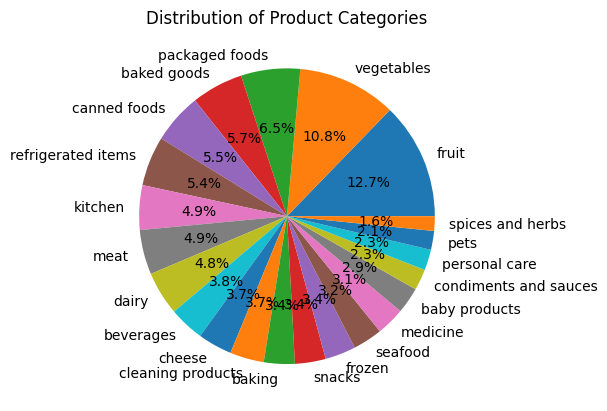

In [ ]:
# Product categories
print(df['category'].value_counts())
plt.pie(df['category'].value_counts(), labels=df['category'].value_counts().index, autopct="%1.1f%%")
plt.title('Distribution of Product Categories')
plt.show()


In [ ]:
# Average spending per product category
avg_spend_per_category = df.groupby('category')['total'].mean()
print(avg_spend_per_category)


category
baby products            29.932902
baked goods              18.844718
baking                   13.075076
beverages                32.992159
canned foods             15.646125
cheese                   23.417304
cleaning products        32.478596
condiments and sauces    17.191160
dairy                    20.137600
frozen                   25.057414
fruit                     6.136483
kitchen                  37.844634
meat                     36.917042
medicine                 42.772757
packaged foods           12.571400
personal care            23.228531
pets                     26.123913
refrigerated items       17.497529
seafood                  42.509130
snacks                    5.913232
spices and herbs          7.571680
vegetables                5.993452
Name: total, dtype: float64


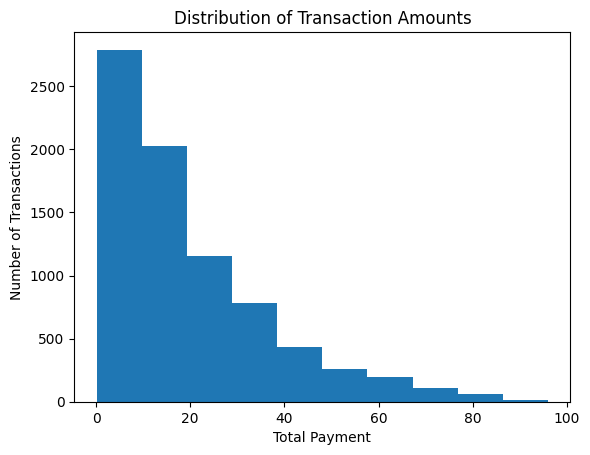

In [ ]:
# Analyze distribution of transaction amounts
plt.hist(df['total'])
plt.xlabel('Total Payment')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Amounts')
plt.show()


In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');


In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

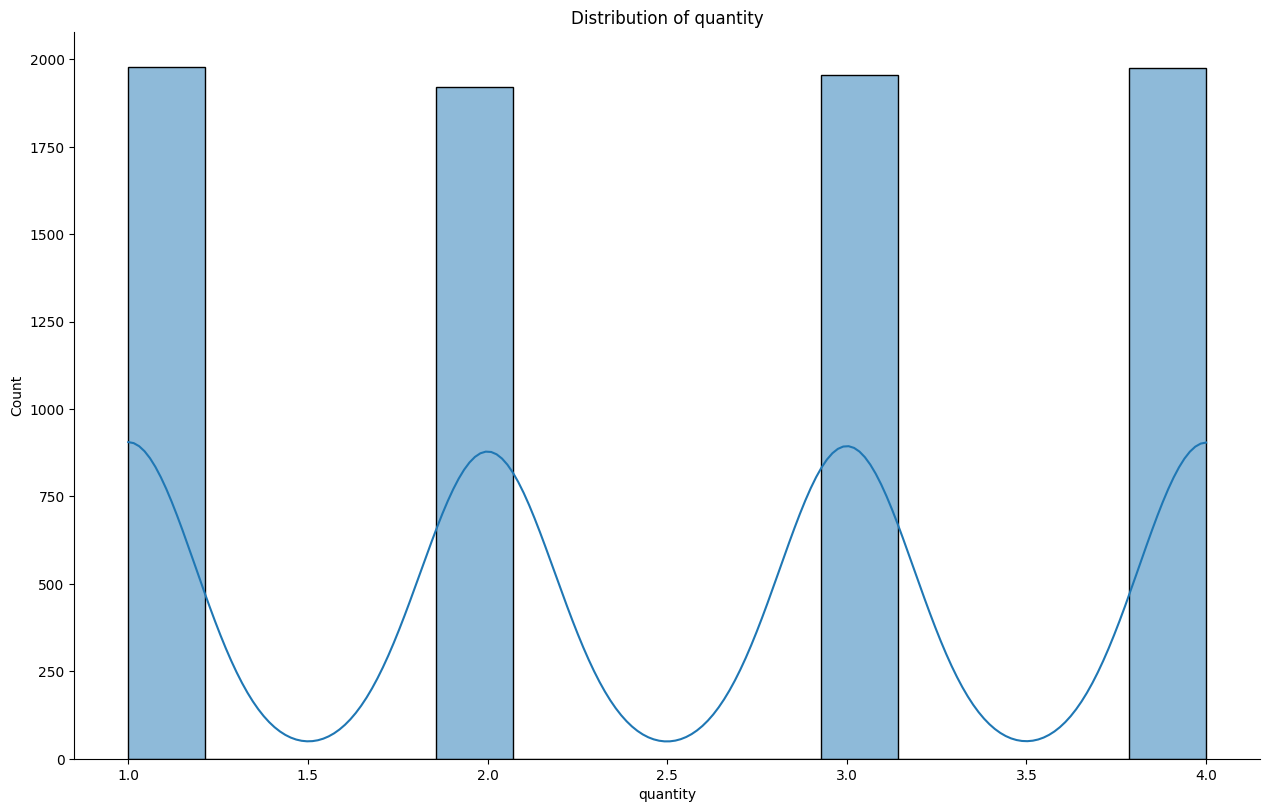

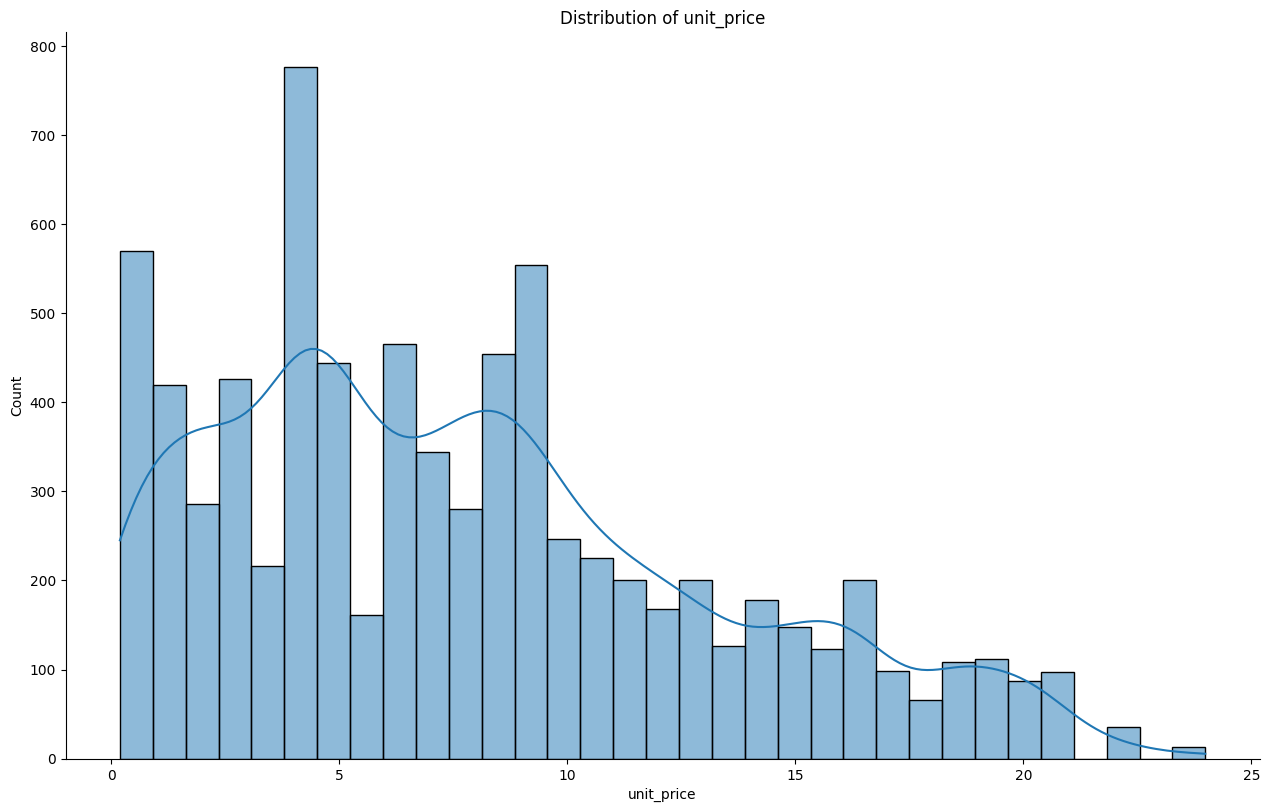

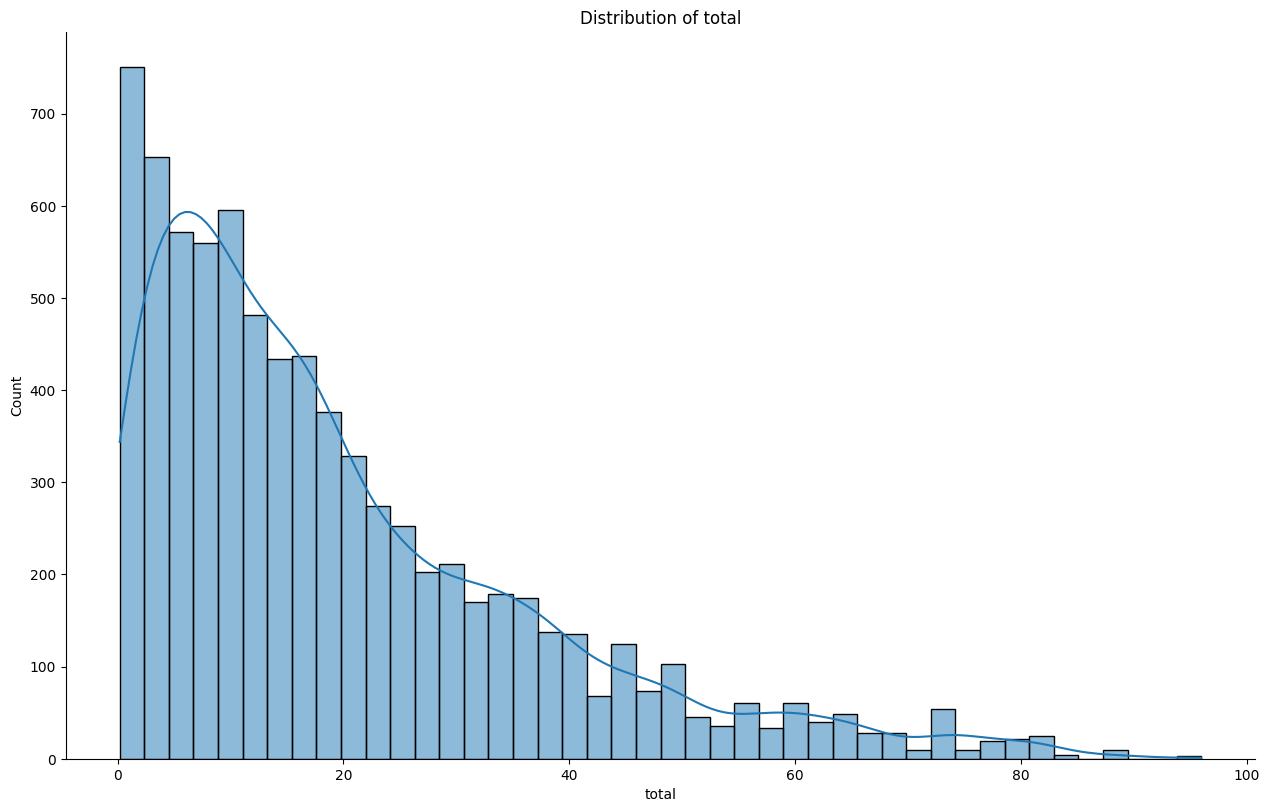

In [ ]:
plot_continuous_distribution(df, 'quantity')
plot_continuous_distribution(df, 'unit_price')
plot_continuous_distribution(df, 'total')


In [ ]:
df_numeric = df.select_dtypes(include='number')


In [ ]:

corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000
